# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1



The original data is 1500 rows and 8 columns.

The first thing is to clean up rows and the dataset where there are missing value or incorrect data type.
- 	Replace 25 rows which has missing value in category column as Unknown.
- 	No missing values found under animal, sales & repeat_purchase column
- 	Replace MEDIUM at size column with Capitalize case Medium
- 	Replace 150 rows of unlisted under price column with overall median price
- 	Replace 150 rows of NA under rating column with 0
After cleaning up and replacement, the data set remain 1500 rows and 8 columns.
- 	There are 7 unique category including unknown
- 	There were 4 animal types, as expected
- 	There were 3 size types, as expected
- 	Sales range from 286.94 to 2255.96, no negative values and all rounded to 2 decimal places as expected. 
- 	Rating range from 0 to 9, while all rating 0 records related to unlisted item under price column
- 	There are 2 repeat purchase category – 1 for repeatedly buy or 0 for not repeatedly buy, as expected.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#import file
df=pd.read_csv('pet_supplies_2212.csv')

# check if missing values
print(df.isna().any())

#replace unknown category into unknown
df['category']=df['category'].replace('-', 'Unknown')

#replace unknown MEDIUM into Medium
df['size']=df['size'].replace('MEDIUM', 'Medium')

#replace missing values
df['rating']=df['rating'].fillna(0)

#replace unlisted into avg price
avg_price=np.mean(df['price'][df['price']!='unlisted'].astype(float))
df['price']=df['price'].replace('unlisted', avg_price).astype(float)


# check for df completeness
print(df.groupby(['rating']).mean())
df.info()
print(df.isna().any())


product_id         False
category           False
animal             False
size               False
price              False
sales              False
rating              True
repeat_purchase    False
dtype: bool
        product_id      price        sales  repeat_purchase
rating                                                     
0.0     725.340000  29.424304  1046.320267         0.580000
1.0     789.750000  24.601667   671.960833         0.833333
2.0     766.906977  26.323721   762.556744         0.627907
3.0     719.505263  27.588632   871.425632         0.663158
4.0     763.876325  28.654170   928.743569         0.632509
5.0     759.707237  30.114342   999.050033         0.578947
6.0     739.729097  30.036221  1045.132676         0.575251
7.0     777.741259  30.267413  1097.675385         0.615385
8.0     779.819672  32.558852  1243.570984         0.573770
9.0     713.066667  32.985333  1310.578000         0.400000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to

## Task 2

**What is the most repeated purchase by products?**

One thing to highlight before dive into the analysis is that there are transaction records which stated as unlisted in our database. Assuming those are related to the products which is no longer available for sale, it should be excluded in our analysis even though we have cleaned up the data set to ensure completeness and readable.

There are 7 categories included in this data. The most repeated purchase by category is equipment with over 200 transactions, with daily products such as food and medicine and luxury product such as housing and toys being second which each represents about 10% of total transactions respectively. This would suggest that the team should formulate a marketing strategy focus on boosting sales in food and medicine.


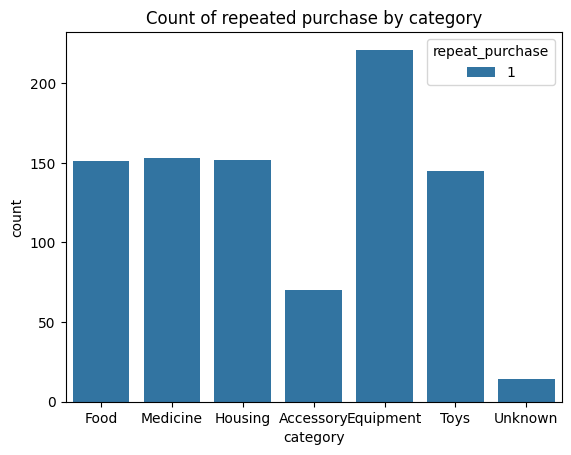

In [10]:
#graph 1

graph_1=sns.countplot(data=df[df['repeat_purchase']==1], x='category', hue='repeat_purchase')
graph_1.set(title='Count of repeated purchase by category')

plt.show()

## Task 3

**How does the range in sales differ across products for repeated purchase?**

To further understand the nature of repeated purchase, we should look at how the sales is distributed. To reiterate, the data does not include transactions which are unlisted. Looking at the sales diagram it shows that most purchase are equal or below 1000. There are some outlier more that 2000 but is very uncommon. 


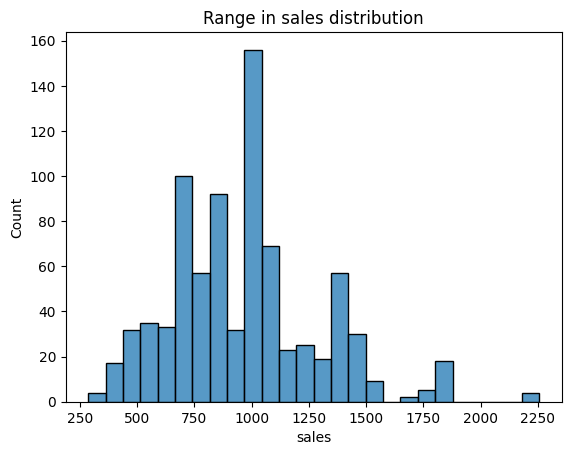

In [11]:
#graph 2
df2=df[(df['rating']!=0) & (df['repeat_purchase']==1)]
graph_2=sns.histplot(data=df2, x='sales', bins='auto')
graph_2.set(title='Range in sales distribution')

plt.show()

To further breakdown the sales distribution by category, it shows that majority of equipment are equal or below 1000, in contrast toys are appeared to have higher sales from 1000 to 1500. 

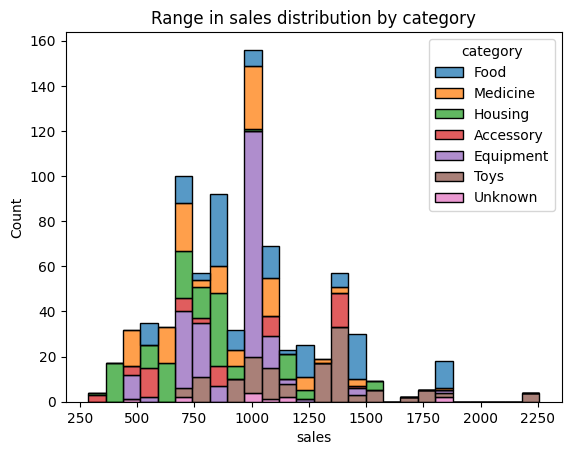

In [20]:
#graph3
df2=df[(df['rating']!=0) & (df['repeat_purchase']==1)]
graph_3=sns.histplot(data=df2, x='sales', hue='category', bins='auto', multiple='stack')
graph_3.set(title='Range in sales distribution by category')

plt.show()

## Task 4

**How does the sales vary across different product type for repeated purchase?**

We would deep dive into each category and the relationship between sales for repeated purchase.

From previous section it shows that equipment is the most repeated purchase item for the period, however when it compares in terms of sales, the interquartile range of sales is lower than food. This would suggest that the average sales for food is higher than equipment. In contrast, it is observed that toys have higher median than food.

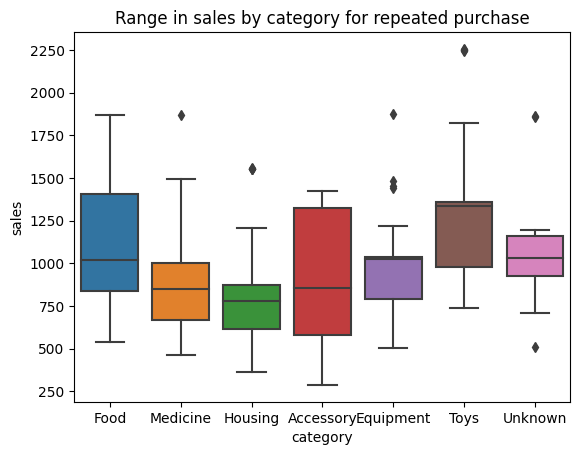

In [13]:
#graph 4
df3=df[(df['rating']!=0) & (df['repeat_purchase']==1)]
graph_4=sns.boxplot(data=df3, x='category', y='sales')
graph_4.set(title='Range in sales by category for repeated purchase')

plt.show()

Besides the repeated purchase, we would like to compare it with single purchase to see if there is any insights. After removing the outliers, it has a higher single purchase sales compared to the repeat purchases sales in general with higher interquartile range and median. 

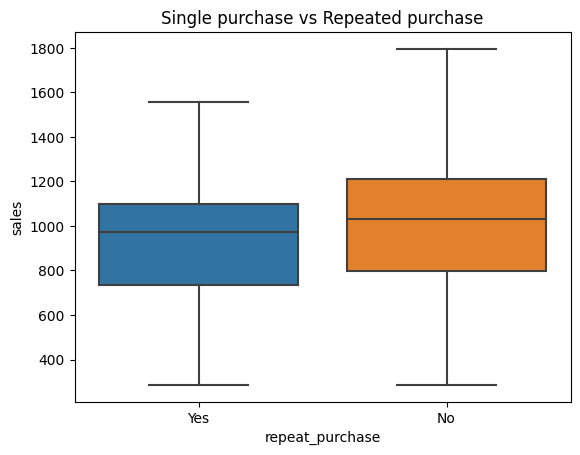

In [18]:
#graph 5
df2=df[df['rating']!=0]
df2['repeat_purchase']=df2['repeat_purchase'].map({0:'No', 1:'Yes'})
graph_5=sns.boxplot(data=df2, x='repeat_purchase', y='sales', showfliers=False)
graph_5.set(title='Single purchase vs Repeated purchase')

plt.show()

Based on all of the above, we discovered that while the team would like to boost sales for everyday items such as food, they should also explore different direction of marketing strategy given the popularity of items such as toys and equipment. It would be worth for further analysis on the relationship of pricing and sales so that to analyze whether some pricing strategies is needed to boost sales on daily product if needed.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam